# PROYECTO FINAL APRENDIZAJE AUTOMÁTICO

## Machine Learning aplicado a la predicción de la media de un jugador en FIFA 19

#### Alumnos: Raúl Blas Ruiz y Amaro Blest Polo

El objetivo del proyecto es el de conseguir realizar una predicción sobre si la media (Overall) de un jugador es superior o menor a un valor de 70 puntos. Para ello se van a usar los métodos de machine learning vistos en la asignatura de AAMD:

- **Regresión Logística**
- **Redes Neuronales**
- **Support Vector Machines (SVM)**

Para la realización del proyecto se va a utilizar un dataset obtenido de la plataforma [Kaggle.com](https://www.kaggle.com/karangadiya/fifa19). Este dataset cuenta con más de 70 datos sobre 18.208 jugadores. Entre los datos podemos encontrar algunos como:

- **Age**
- **Nationality**
- **Overall**
- **Potential**
- **Preferred Foot**
- **Weak Foot**
- **Dribling**
- **Etc.**

Gracias a algunos de estos datos vamos a realizar un estudio usando las técnicas de Machine Learning mencionadas anteriormente, para la predicción de un Overall mayor o menor a 70. Los datos escogidos para el desarrollo son los siguientes:

- **Age**
- **Potential**
- **Preferred Foot**
- **Weak foot**
- **Dribling**
- **ShotPower**

Para ello vamos a realizar, en primaria instancia, una serie de modificaciones al dataset para poder empezar con el desarrollo buscado.

In [1]:
# CELDA GLOBAL DE IMPORTS
import numpy as np
import time
import pandas as pd
from pandas import DataFrame
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm

### Creación de un array que contendrá el porcentaje de acierto de los diferentes métodos de Machine Learning

In [2]:
predictions_percentage = np.arange(4, dtype = float)

In [3]:
# Haciendo uso de la librería pandas conseguimos un dataFrame con las columnas deseadas a modo de tabla
project_data = pd.read_table('data.csv', sep=',', usecols=['Name', 'Age', 'Overall', 'Potential', 'Preferred Foot', 'Weak Foot', 'Dribbling', 'ShotPower'])
project_data

,Name,Age,Overall,Potential,Preferred Foot,Weak Foot,Dribbling,ShotPower
0,L. Messi,31,94,94,Left,4.0,97.0,85.0
1,Cristiano Ronaldo,33,94,94,Right,4.0,88.0,95.0
2,Neymar Jr,26,92,93,Right,5.0,96.0,80.0
3,De Gea,27,91,93,Right,3.0,18.0,31.0
4,K. De Bruyne,27,91,92,Right,5.0,86.0,91.0
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,47,65,Right,2.0,42.0,43.0
18203,N. Christoffersson,19,47,63,Right,2.0,39.0,41.0
18204,B. Worman,16,47,67,Right,3.0,45.0,45.0
18205,D. Walker-Rice,17,47,66,Right,3.0,51.0,64.0


## Comprobación del dataset

Comprobamos que el dataset está completo en todos los datos que vamos a usar. Si no es así mostramos en que columnas se encuentran los datos de tipo NaN.

In [4]:
print('¿Existen datos NaN en el dataset?')
dataNaN = project_data.isnull().values.any()
print(dataNaN)
if dataNaN:
    print('Columnas que contienen datos NaN')
    print(project_data.isnull().any())

¿Existen datos NaN en el dataset?
True
Columnas que contienen datos NaN
Name              False
Age               False
Overall           False
Potential         False
Preferred Foot     True
Weak Foot          True
Dribbling          True
ShotPower          True
dtype: bool


## Eliminación de datos NaN

Dado que en las columnas de Preferred Foot, Weak Foot, Dribbling y ShotPower hemos encontrado que existen datos NaN, vamos a comprobar cuántos jugadores tienen esos datos incompletos.

In [5]:
total_nan_values = project_data.isnull().sum()
total_nan_values

Name               0
Age                0
Overall            0
Potential          0
Preferred Foot    48
Weak Foot         48
Dribbling         48
ShotPower         48
dtype: int64

Ya que como hemos podido comprobar son solo 48 de 18.207 jugadores los que tienen valores NaN a partir de la columna Preferred Foot hemos decidido descartarlos haciendo uso de la función dropna() de DataFrame.

In [6]:
project_data = project_data.dropna()
# Re-comprobamos que ahora no existen valores NaN en ninguna fila
total_nan_values = project_data.isnull().sum()
total_nan_values

Name              0
Age               0
Overall           0
Potential         0
Preferred Foot    0
Weak Foot         0
Dribbling         0
ShotPower         0
dtype: int64

## Transformación de la columna Preferred Foot a números

Para la comodidad en el tratamiento de los datos, hemos decidido cambiar la columna Preferred Foot, que contiene valores 'Right' o 'Left' siendo ahora 'Right' = 0 y 'Left' = 1.

In [7]:
project_data['Preferred Foot'] = project_data['Preferred Foot'].map({'Right': 0, 'Left': 1}, na_action=None)
project_data

<ipython-input-7-d6661a03093a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_data['Preferred Foot'] = project_data['Preferred Foot'].map({'Right': 0, 'Left': 1}, na_action=None)


,Name,Age,Overall,Potential,Preferred Foot,Weak Foot,Dribbling,ShotPower
0,L. Messi,31,94,94,1,4.0,97.0,85.0
1,Cristiano Ronaldo,33,94,94,0,4.0,88.0,95.0
2,Neymar Jr,26,92,93,0,5.0,96.0,80.0
3,De Gea,27,91,93,0,3.0,18.0,31.0
4,K. De Bruyne,27,91,92,0,5.0,86.0,91.0
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,47,65,0,2.0,42.0,43.0
18203,N. Christoffersson,19,47,63,0,2.0,39.0,41.0
18204,B. Worman,16,47,67,0,3.0,45.0,45.0
18205,D. Walker-Rice,17,47,66,0,3.0,51.0,64.0


## Transformación de la columna Overall

Por último para poder empezar a trabajar en las técnicas de Machine Learning, vamos a transformar la columna de la media de cada jugador. Si el jugador cuenta con una media superior a 70 su valor de Overall será 1, por el contrario si su media es menor o igual a 70 su valor de Overall será 0.

In [8]:
project_data['Overall'] = [1 if s > 70 else 0 for s in project_data['Overall']]
project_data

<ipython-input-8-cd68979dde04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_data['Overall'] = [1 if s > 70 else 0 for s in project_data['Overall']]


,Name,Age,Overall,Potential,Preferred Foot,Weak Foot,Dribbling,ShotPower
0,L. Messi,31,1,94,1,4.0,97.0,85.0
1,Cristiano Ronaldo,33,1,94,0,4.0,88.0,95.0
2,Neymar Jr,26,1,93,0,5.0,96.0,80.0
3,De Gea,27,1,93,0,3.0,18.0,31.0
4,K. De Bruyne,27,1,92,0,5.0,86.0,91.0
...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,0,65,0,2.0,42.0,43.0
18203,N. Christoffersson,19,0,63,0,2.0,39.0,41.0
18204,B. Worman,16,0,67,0,3.0,45.0,45.0
18205,D. Walker-Rice,17,0,66,0,3.0,51.0,64.0


## AJUSTED PARA LAS COMPARATIVAS EN GRÁFICAS
A continuación vamos a realizar ajustes en las columnas para mostrar gráficas comparativas que nos introduzcan al estudio de machine learning.

In [9]:
# Método encargado de realizar los cálculos necesarios para dibujar las gráficas de barras comparativas
def drawCompareGraphic(column, title, columnValues):    
    num_values = project_data[column].value_counts()
    feature_labels = num_values.axes[0].tolist()
    inde = np.arange(len(feature_labels))

    BiggerThan70 = []
    SmallerOrEqual70 = []

    for feat in feature_labels:
        quantity = len(project_data[project_data[column] == feat].index)
        highRated = len(project_data[(project_data[column] == feat) & (project_data['Overall'] == 1)].index)
        BiggerThan70.append(highRated)
        SmallerOrEqual70.append(quantity-highRated)

    ancho = 0.4
    fig, ax = plt.subplots(figsize=(10,8))
    ax.bar(inde, BiggerThan70, ancho, color='blue')
    ax.bar(inde+ancho, SmallerOrEqual70, ancho, color='red')
    ax.set_xlabel(column, fontsize = 15)
    ax.set_ylabel('Number Of Players',fontsize=15)  
    ax.set_title(title,fontsize=15)
    ax.set_xticks(inde+ancho/2)
    ax.set_xticklabels(columnValues, fontsize=10)
    ax.legend(['> 70', '<= 70'])
    plt.show()

### Ajustes en la columna Age y gráfica comparativa
Para poder realizar la comparación con la columna de la edad vamos a ordenar los jugadores de menor a mayor edad y vamos a eliminar los duplicados para obtener un array que contenga todas las edades diferentes del dataset. A continuación, llamaremos al método realizado anteriormente para dibujar la gráfica que compara los valores de la media en función de la edad.

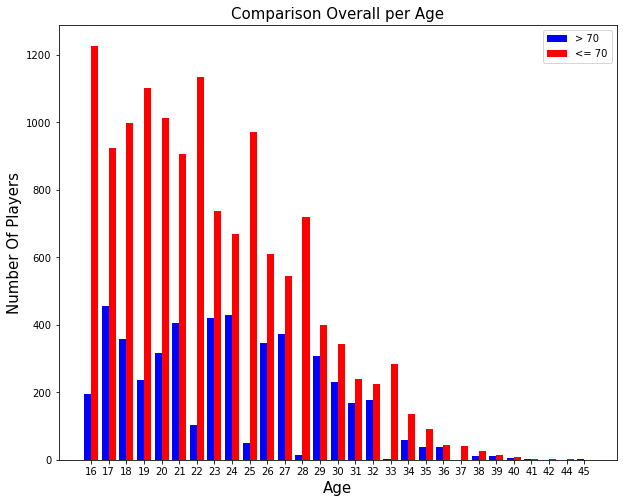

In [10]:
dataAux = project_data.sort_values('Age').drop_duplicates(subset=['Age'], keep="first")
dataAge_Without_duplicates = dataAux['Age']
drawCompareGraphic('Age', 'Comparison Overall per Age', dataAge_Without_duplicates)

### Ajustes en la columna Potential y gráfica comparativa
Para poder realizar la comparación con la columna del potencial vamos a seguir la misma estructura que con la edad.

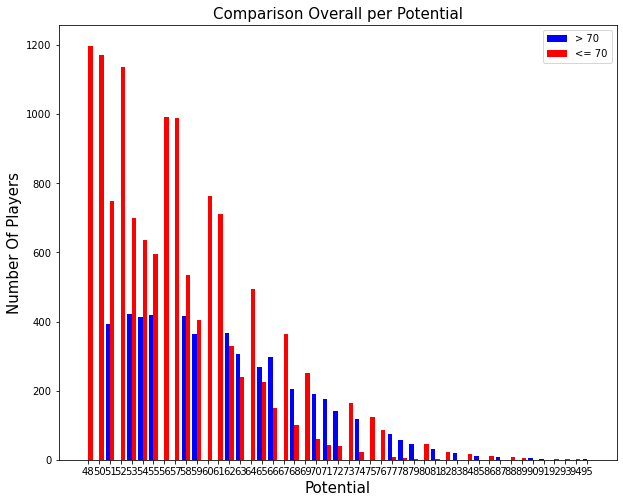

In [11]:
dataAux = project_data.sort_values('Potential').drop_duplicates(subset=['Potential'], keep="first")
dataPotential_Without_duplicates = dataAux['Potential']
drawCompareGraphic('Potential', 'Comparison Overall per Potential', dataPotential_Without_duplicates)

### Ajustes en la columna Preferred Foot y gráfica comparativa
Para poder realizar la comparación con la columna de Preferred Foot vamos a observar cuantos jugadores prefieren la pierna derecha (0) o izquierda (1) en función de si su media es mayor o menor a 70.

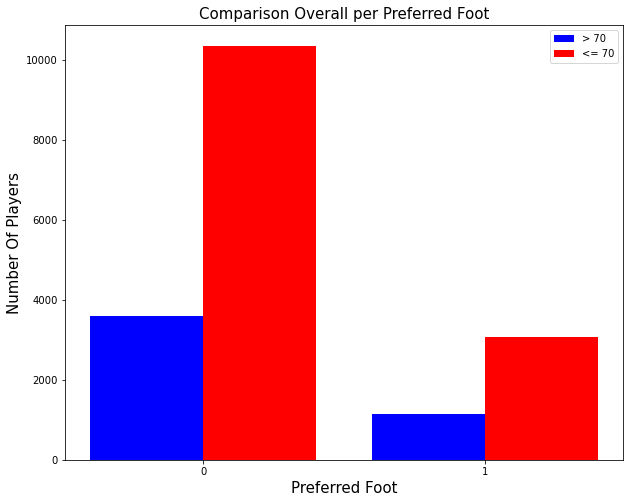

In [12]:
dataAux = project_data.sort_values('Preferred Foot').drop_duplicates(subset=['Preferred Foot'], keep="first")
dataPrefFoot_Without_duplicates = dataAux['Preferred Foot']
drawCompareGraphic('Preferred Foot', 'Comparison Overall per Preferred Foot', dataPrefFoot_Without_duplicates)

### Ajustes en la columna Weak Foot y gráfica comparativa
Para poder realizar la comparación con la columna de Weak Foot vamos a realizar un proceso como los anteriores.

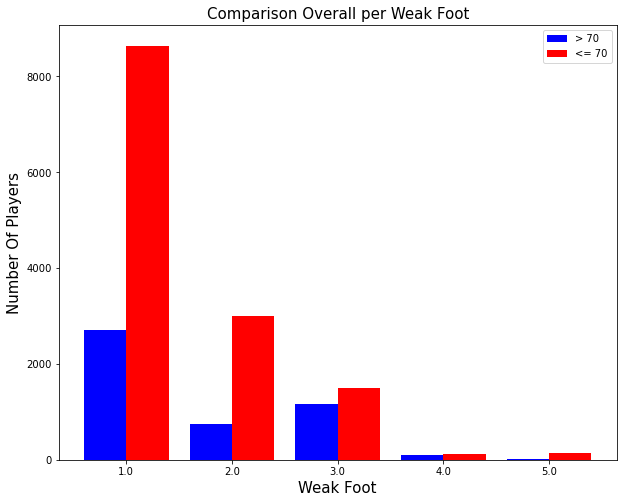

In [13]:
dataAux = project_data.sort_values('Weak Foot').drop_duplicates(subset=['Weak Foot'], keep="first")
dataWeakFoot_Without_duplicates = dataAux['Weak Foot']
drawCompareGraphic('Weak Foot', 'Comparison Overall per Weak Foot', dataWeakFoot_Without_duplicates)

### Ajustes en las columnas Dribbling y ShotPower y vista de sus gráficas comparativas
Para poder realizar las comparaciones de estas columnas realizamos el mismo proceso que para las anteriores gráficas.

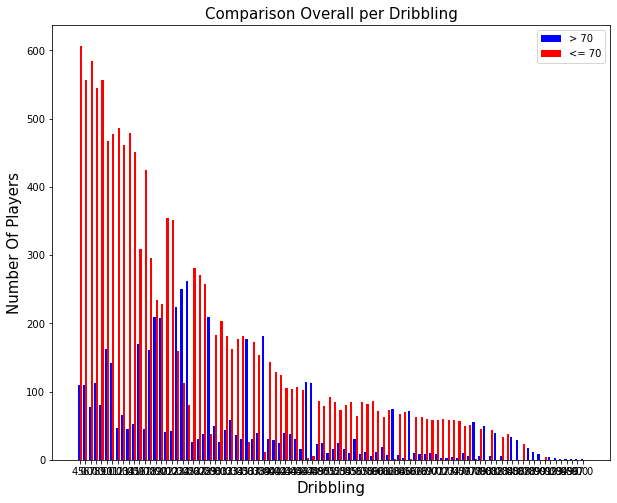

In [14]:
#Dribbling
dataAux = project_data.sort_values('Dribbling').drop_duplicates(subset=['Dribbling'], keep="first")
dataDrib_Without_duplicates = dataAux['Dribbling']
drawCompareGraphic('Dribbling', 'Comparison Overall per Dribbling', dataDrib_Without_duplicates)

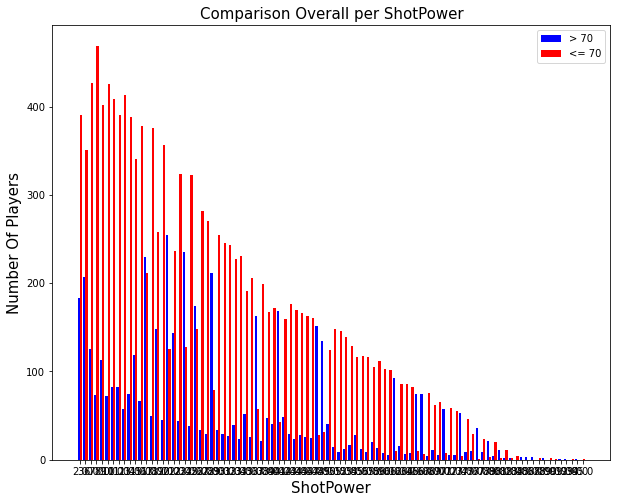

In [15]:
#ShotPower
dataAux = project_data.sort_values('ShotPower').drop_duplicates(subset=['ShotPower'], keep="first")
dataShot_Without_duplicates = dataAux['ShotPower']
drawCompareGraphic('ShotPower', 'Comparison Overall per ShotPower', dataShot_Without_duplicates)

## CONCLUSION PARCIAL DE LAS GRÁFICAS REALIZADAS
En primer lugar cabe destacar el hecho de que existen muchos más jugadores con una media menor o igual a 70 de los que hay con un overall superio a dicho valor. 

En cuanto a la gráfica de la edad hemos podido observar que la dominancia de jugadores con una media inferior se encuentra en el rango de edades entre los 16 y los 33 años mientras que a partir de los 34 años, al haber menos jugadores, la comparativa está más igualada.

Sucede algo similar con la gráfica del potencial, ya que como se ha podido observar en la imagen a menor es el potencial mayor es la dominancia de jugadores con media menor o igual a 70. Sin embargo, se puede ver que a partir de un potencial de unos 70 puntos, destacan los jugadores con media superior sobre los que tienen una media inferior.

Hablando sobre las gráficas de la pierna buena y la pierna mala, hemos podido comprobar que la pierna preferida de los jugadores es la pierna derecha en ambos casos, tanto en los de una media menor o igual a 70 como en los que tienen mayor media. En cuanto a la pierna mala se puede observar que la mayoría de jugadores con media menor a 70 no superan los 3 puntos de valoración mientras que los jugadores con media mayor a 70, a pesar de menos en el global, siguen haciendo frente a los de menor en media en los valores entre 2 y 5 de pierna mala.

El dribbling y la potencia de tiro cuentan con gráficas muy similares donde se puede observar que solo unos pocos jugadores cuentan con muy buena puntuación sobre estos dos atributos, ya que se puede ver como el número de jugadores desciende exponelciamente a medida que la puntuación de uno de estos atributos aumenta.

## PREPARACIÓN DE LOS DATOS PARA REGRESIÓN LOGÍSTICA
Procedemos a eliminar la columna del **Name** de los jugadores ya que no nos interesa para hacer la predicción. Una vez hecho esto, cambiamos el orden de las columnas del dataframe dejando en última posición el **Overall** para mayor comodidad en el trato de los datos. 

In [16]:
project_data = project_data.drop(['Name'], axis=1)
new_order = [0,2,3,4,5,6,1]
project_data = project_data[project_data.columns[new_order]]
project_data

,Age,Potential,Preferred Foot,Weak Foot,Dribbling,ShotPower,Overall
0,31,94,1,4.0,97.0,85.0,1
1,33,94,0,4.0,88.0,95.0,1
2,26,93,0,5.0,96.0,80.0,1
3,27,93,0,3.0,18.0,31.0,1
4,27,92,0,5.0,86.0,91.0,1
...,...,...,...,...,...,...,...
18202,19,65,0,2.0,42.0,43.0,0
18203,19,63,0,2.0,39.0,41.0,0
18204,16,67,0,3.0,45.0,45.0,0
18205,17,66,0,3.0,51.0,64.0,0


## REGRESIÓN LOGÍSTICA
Dado que en la regresión logística queremos mostrar a través de una frontera recta la división de los datos, hemos decidido hacer una predicción del **Overall** a partir de la **edad** y el **potencial**.

### Idea de la regresión logística
TO DO A UN MARKDOWN BIEN HECHO DE CARA A LA PRESENTACIÓN
La derivada de la funcion de coste igualada a 0 es punto minimo de una funcion convexa. Dado que tratamos en la regresion logistica con funciones no convexas podriamos tratar con muchas ecuaciones de derivadas igualadas a 0, es por ello que utilizamos el metodo del descenso de gradiente, que a efectos prácticos nos da la pendiente o inclinación del "terreno", sin embargo nos da la dirección de la pendiente "hacia arriba" es por ello que para resolver el problema se hace hasta la convergencia O:= O - alpha * gradiente.

Coste de la función:  0.6931471805599462
Gradiente de la función:  [ 0.23847679  5.43361419 15.48372708]


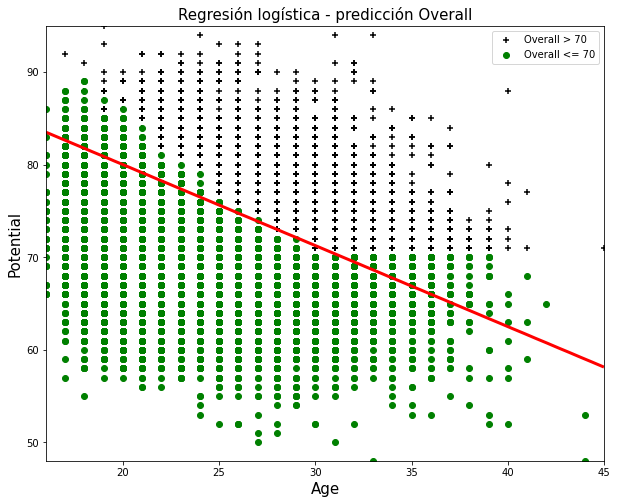

[90.95765185  1.          2.          3.        ]
Resultado de la predicción: 90.9576518530756


In [17]:
def func_sigmoide(X):
    return 1 / (1 + np.exp(-X))

def cost(theta, X, Y):
    Hipothesis = func_sigmoide(np.matmul(X, theta))
    cost = (- 1 / (len(X))) * (np.dot(Y, np.log(Hipothesis)) +
                               np.dot((1 - Y), np.log(1 - Hipothesis)))
    return cost
    
def gradient(theta, XX, Y):
    H = func_sigmoide(np.matmul(XX, theta))
    grad = (1 / len(Y)) * np.matmul(np.transpose(XX), H - Y)
    return grad

def drawFrontRect(X, Y, theta):
    plt.figure(figsize=(10,8))
    ax = plt.subplot()
    ax.set_xlabel('Age', fontsize = 15)
    ax.set_ylabel('Potential',fontsize=15)  
    ax.set_title('Regresión logística - predicción Overall',fontsize=15)
    
    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    h = func_sigmoide(np.c_[np.ones((  xx1.ravel().shape[0], 1)),
                                   xx1.ravel(),
                                   xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)
    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar
    plt.contour(xx1, xx2, h, [0.5], linewidths=3, colors='r')

#Evaluación de los resultados obtenidos en las predicciones con las thetas óptimas
def evaluateLogisticRegression(ThetaOpt, X, Y):
    thetaMatrix = np.matrix(ThetaOpt)   
    Z = np.dot(thetaMatrix, X.transpose())
    results = func_sigmoide(Z)
    results[results >= 0.5] = 1
    results[results < 0.5] = 0
    prediction = sum(np.where(results == Y)).shape[0]
    return (prediction / len(Y)) * 100

# CAPTACIÓN DE LOS DATOS
X = project_data.iloc[:, :2].values # X es una matriz de 18159 rows × 2 columns con los datos que van a ser usados para la prediccion de la media
Y = project_data.iloc[:, 6].values # Y es una matriz/vector 18159 rows × 1 column con la columna del Overall, (0 <= 70 & 1 > 70)

X = np.hstack([np.ones([np.shape(X)[0], 1]), X])
n = np.shape(X)[1]
Theta = np.zeros(n)

print("Coste de la función: ", cost(Theta, X, Y))
print("Gradiente de la función: ", gradient(Theta, X, Y))

#Obtiene un vector con los índices de los ejemplos con Overall mayor a 70 
GreaterThan70 = np.where(Y == 1)
#Obtiene un vector con los índices de los ejemplos con Overall menor o igual a 70 
LesserOrEqualThan70 = np.where(Y == 0)

# obtener el valor de los parámetros Theta que minimizan la función de coste para la regresión logística
result = opt.fmin_tnc(func = cost, x0 = Theta, fprime = gradient, args = (X, Y))
theta_opt = result[0]

drawFrontRect(X, Y, theta_opt)

# Dibuja los ejemplos positivos
plt.scatter(X[GreaterThan70 , 1] , X[GreaterThan70 , 2] , marker='+' , c='k', label="Overall > 70")
# Dibuja los ejemplos negativos
plt.scatter(X[LesserOrEqualThan70 , 1] , X[LesserOrEqualThan70 , 2] , marker='o' , c='g', label="Overall <= 70")
plt.legend()

plt.show()


prediction = evaluateLogisticRegression(theta_opt, X, Y)
predictions_percentage[0] = (prediction)
print(predictions_percentage)
print("Resultado de la predicción:", prediction)

## REDES NEURONALES

### Retro-propagacion -> Forward propagation
El algoritmo de retro-propagación nos permite calcular el gradiente de la función de coste de la red neuronal.

Para ello se utilizaran 2 funciones, forwardProp y backprop.

ForwardProp es una funcion de hipotesis que utiliza un valor de entrada para predecir una salida mediante una matriz de pesos. Tambien añadira un termino de sesgo.

In [18]:
# Celda para testear redes neuronales con menos filas y evitar que tarde tanto
aux_data = project_data.drop(project_data.loc[500:18158].index)
aux_data = aux_data.reset_index(drop=True)

Xaux = aux_data.iloc[:, :2].values
Yaux = aux_data.iloc[:, 6].values
aux_data

,Age,Potential,Preferred Foot,Weak Foot,Dribbling,ShotPower,Overall
0,31,94,1,4.0,97.0,85.0,1
1,33,94,0,4.0,88.0,95.0,1
2,26,93,0,5.0,96.0,80.0,1
3,27,93,0,3.0,18.0,31.0,1
4,27,92,0,5.0,86.0,91.0,1
...,...,...,...,...,...,...,...
543,19,65,0,2.0,42.0,43.0,0
544,19,63,0,2.0,39.0,41.0,0
545,16,67,0,3.0,45.0,45.0,0
546,17,66,0,3.0,51.0,64.0,0


In [19]:
def forwardProp(Theta1, Theta2, X):
    z1 = Theta1.dot(X.T)
    a1 = func_sigmoide(z1)
    tuple = (np.ones(len(a1[0])), a1)
    a1 = np.vstack(tuple)
    z2 = Theta2.dot(a1)
    a2 = func_sigmoide(z2)
    return z1, a1, z2, a2

### Función de coste
La función de coste, se implementara con regularización. Como entrada a dicha función, hemos de preparar un vector de Y distinto al recibido. Será una matriz de (numElementos, numEtiquetas) donde cada fila corresponde a un caso. Cada fila tendrá todos los valores a cero menos el valor real que representa ese caso, que estará a 1.

In [81]:
def gradiente(theta1, theta2, X, y, reg):
    
    z2 = np.dot(X, theta1.T)

    a2 = func_sigmoide(z2)
    z3 = np.dot(a2,theta2.T)
    a3 = func_sigmoide(z3)
    
    d3 = np.max(a3) - y
    d2 = np.dot(d3, theta2) * sigmoideDerivada(z2)

    A1 = np.dot(d2.T, X)
    A2 = np.dot(d3.T, a2)
    
    A1 = A1 / len(X)
    A2 = A2 / len(X)
    return A1, A2

def gradienteReg(theta1, theta2, X, y, reg):
    A1, A2 = gradiente(theta1, theta2, X ,y, reg)
    reg1 = (reg / len(y)) * theta1
    reg2 = (reg / len(y)) * theta2
    
    reg1[:,:1]=0
    reg2[:,:1]=0
    
    A1reg = A1.copy()
    A2reg = A2.copy()
    A1reg += reg1
    A2reg += reg2
    
    return A1reg,A2reg

def h0(X, theta1, theta2):
    aa = np.dot(X,theta1.T)
    afs = func_sigmoide(aa)
    a2dot = np.dot(afs,theta2.T)
    a2fs = func_sigmoide(a2dot) 
    return a2fs

def coste(theta1, theta2, X, y, reg):
    J = np.sum(-y * np.log(h0(X, theta1, theta2))-(1-y)*np.log(1-h0(X, theta1, theta2)))/len(y)
    return J

def costFun(X, y, theta1, theta2, reg):
    thetaAux1 = np.delete(theta1, 0, 1)
    thetaAux2 = np.delete(theta2, 0, 1)
    regularized = (reg / (2*len(X))) * (sum(sum(np.power(thetaAux1, 2))) + sum(sum(np.power(thetaAux2, 2))))
    return coste(theta1, theta2, X, y, reg) + regularized 

    

def getYMatrix(Y, nEtiquetas):
    nY = np.zeros((len(Y), nEtiquetas))
    yaux = np.array(Y) -1
    
    for i in range(len(nY)):
        z = yaux[i]
        if(isinstance(z, np.uint8)):
            if(z == 10): z = 0
            nY[i][z] = 1
        else:
            z = yaux[i].all()
            if(z == 10): z = 0
            nY[i][z] = 1
    return nY

### BackPropagation
Backpropagation se usa para repartir el error entre las neuronas de la red neuronal. 
Comienza desde la ultima capa y desde esa desciende hasta la penúltima, ya que no se puede 
repartir error para la capa de entrada.

In [21]:
def sigmoideDerivada(value):
    temp = func_sigmoide(value)
    return temp * (1 - temp)

In [82]:
#Devuelve el coste y el gradiente de una red neuronal de 3 capas
def backprop(params_rn, num_entradas,num_ocultas, num_etiquetas, X, Y, reg):
    th1 = np.reshape(params_rn[:num_ocultas * (num_entradas + 1)], (num_ocultas, (num_entradas + 1)))
    th2 = np.reshape(params_rn[num_ocultas * (num_entradas + 1):], (num_etiquetas, (num_ocultas)))
    coste = costFun(X, Y, th1, th2, reg)
    gradd1 ,gradd2 = gradienteReg(th1, th2, X, Y, reg)
    gradd = np.concatenate((np.ravel(gradd1),np.ravel(gradd2)))
    
    return coste

### Inicializacion aleatoria de thetas

In [44]:
def InitRandomWeight(L_in, L_out):
    Eini = 0.12
    return np.random.uniform(-Eini, Eini, [L_out, L_in])

### Prueba de la red Neuronal

In [84]:
#Creación de casos de entrenamiento aleatorios para las redes neuronales
#X_test coge aleatoriamente el test_size % de los casos del dataset
#X_train es el total de casos  - los casos de X_test
#lo mismo sucede con la Y para Y_Train e Y_test
X_Train, X_test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print('Chanchitos ', X_Train.shape)
print(Y_Train.ndim)
Y_Train = np.expand_dims(Y_Train, axis = 1)
print(Y_Train.ndim)

#Creación de las etiquetas necesarias
tags = np.zeros((len(Y_Train), 2))
for i in range(len(Y_Train)):
    tags[i][Y_Train[i]] = 1

numEntradas = X_Train.shape[1] - 1 # es -1 porque no contamos la columna de 1's
numOcultas = 10
numEtiquetas = 2

#Inicializamos theta con pesos aleatorios
theta1 = InitRandomWeight(numEntradas + 1, numOcultas)
theta2 = InitRandomWeight(numOcultas, numEntradas)
thetaVec = np.append(theta1, theta2).reshape(-1)

#Obtención de las thetas óptimas
result = opt.minimize(fun=backprop, x0=thetaVec, args=(numEntradas, numOcultas, numEtiquetas, X_Train, tags, 1))
thetas_opt = result.x

#Reestablecemos theta para la evalución de resultados
theta1 = np.reshape(result.x[:numOcultas * (numEntradas + 1)], (numOcultas, (numEntradas+1)))
theta2 = np.reshape(result.x[numOcultas * (numEntradas + 1):], (numEtiquetas, numOcultas))

def evalua(results, Y):
    numAciertos = 0
    for i in range(results.shape[0]):
        result = np.argmax(results[i])
        if result == Y[i]: numAciertos += 1  
    return (numAciertos/(results.shape[0]))*100

pred = evalua(h0(X_test, theta1, theta2), Y_test)
print("PREDICTIONS NEURAL NETWORK RESULT:", pred)

Chanchitos  (5447, 3)
1
2


<ipython-input-81-568e68063d99>:42: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-y * np.log(h0(X, theta1, theta2))-(1-y)*np.log(1-h0(X, theta1, theta2)))/len(y)
<ipython-input-81-568e68063d99>:42: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-y * np.log(h0(X, theta1, theta2))-(1-y)*np.log(1-h0(X, theta1, theta2)))/len(y)
<ipython-input-17-89fd6afa7f00>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
<ipython-input-81-568e68063d99>:42: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-y * np.log(h0(X, theta1, theta2))-(1-y)*np.log(1-h0(X, theta1, theta2)))/len(y)
<ipython-input-81-568e68063d99>:42: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-y * np.log(h0(X, theta1, theta2))-(1-y)*np.log(1-h0(X, theta1, theta2)))/len(y)
<ipython-input-17-89fd6afa7f00>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
<ipython-input-17-89fd6afa7f00>:2: RuntimeWarning: ove

PREDICTIONS NEURAL NETWORK RESULT: 59.943360604153554
